## Legal References Extraction


Giacomo Grazia

Final Bachelor Project TU/e & TiU

Academic Year 2024-2025

In [1]:
import pandas as pd
import ast

# Load the CSV file into a DataFrame
df_lf = pd.read_csv("df_with_legal_references_lx_openai.csv")

# Parse the legal references columns (from string to dictionary)
df_lf['legal_references_lx'] = df_lf['legal_references_lx'].apply(ast.literal_eval)
df_lf['legal_references_openai_4omini'] = df_lf['legal_references_openai_4omini'].apply(ast.literal_eval)


df_lf.head(2)

,id,file_number,text_pypdf2,headline,description,publication_date,decision_date,case,parties,file_link,...,combined_text,embedding_headline-description,truncated_text,embedding_decision-body_text-embedding-3-small,category_single_gpt_4o-mini,category_single_from_TEXT_gpt_4o-mini,legal_references_lx,reference_count_lx,legal_references_openai_4omini,reference_count_openai
0,id_acm_energy_permit_0,1,ons kenmerk: acm/uit/606179 zaaknummer: acm/23...,Intrekking op eigen verzoek leveringsvergunnin...,De ACM heeft op 13 augustus 2024 namens de Min...,2024-08-27,2024-08-13,ACM/23/185948,TotalEnergies Power & Gas NL,https://www.acm.nl/nl/publicaties/intrekking-o...,...,Intrekking op eigen verzoek leveringsvergunnin...,"[-0.032432228326797485, 0.012879377231001854, ...",ons kenmerk: acm/uit/606179 zaaknummer: acm/23...,"[-0.0346502922475338, 0.043133415281772614, 0....",intrekking of beëindiging,intrekking of beëindiging,"{'besluit organisatie, mandaat, volmacht en ma...",3,"{'artikel 43, eerste lid, van de gaswet': {'co...",7
1,id_acm_energy_permit_0,2,ons kenmerk: acm/uit/606177 zaaknummer: acm/23...,Intrekking op eigen verzoek leveringsvergunnin...,De ACM heeft op 13 augustus 2024 namens de Min...,2024-08-27,2024-08-13,ACM/23/185948,TotalEnergies Power & Gas NL,https://www.acm.nl/nl/publicaties/intrekking-o...,...,Intrekking op eigen verzoek leveringsvergunnin...,"[-0.032432228326797485, 0.012879377231001854, ...",ons kenmerk: acm/uit/606177 zaaknummer: acm/23...,"[-0.021810347214341164, 0.03195469453930855, 0...",intrekking of beëindiging,intrekking of beëindiging,"{'artikel 95a, eerste lid, van de elektricitei...",10,"{'artikel 95a, eerste lid, van de elektricitei...",6


In [2]:
# example of legal references (data structure)
print(df_lf.legal_references_lx.iloc[0])

{'besluit organisatie, mandaat, volmacht en machtiging acm 2013': {'category': 'wet', 'attributes': {}}, 'stcrt. 2013, nr. 9333': {'category': 'officiele-publicatie', 'attributes': {}}, 'algemene wet bestuursrecht': {'category': 'wet', 'attributes': {}}}


### 1. LinkExtractor

#### 1.1 References distribution and statistics

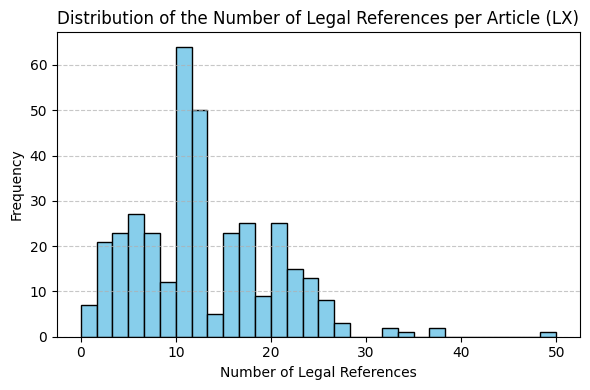

In [3]:
import matplotlib.pyplot as plt
from textwrap import wrap

# Plot 1: Distribution of counts of references
plt.figure(figsize=(6, 4))

# Histogram Plot
plt.hist(df_lf['reference_count_lx'], bins=30, edgecolor='black', color='skyblue')

# Long Title with Wrapping
myTitle = "Distribution of the Number of Legal References per Article (LX)"
wrapped_title = "\n".join(wrap(myTitle, width=70))  # Adjust width for wrapping

# Titles and Labels
plt.title(wrapped_title, fontsize=12)
plt.xlabel('Number of Legal References', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save and Show the Plot
plt.tight_layout()
# plt.savefig('/Users/giacomograzia/Downloads/legal_references_distribution_lx.png', dpi=300)
plt.show()

In [5]:
from collections import Counter

# Ensure the legal_references_openai_4omini column contains valid dictionaries
# Some rows may contain errors or invalid outputs, so we'll filter those out.
def parse_lx_output(row):
    try:
        # Ensure each entry is a valid dictionary
        return ast.literal_eval(row) if isinstance(row, str) else row
    except Exception:
        return {}

# Parse the 'legal_references_openai_4omini' column
df_lf['legal_references_lx'] = df_lf['legal_references_lx'].apply(parse_lx_output)

# Extract all categories from the dictionaries
categories_lx = []
for legal_refs in df_lf['legal_references_lx']:
    categories_lx.extend([ref_data['category'] for ref_data in legal_refs.values()])

# Count the occurrences of each category
category_counts_lx = Counter(categories_lx)

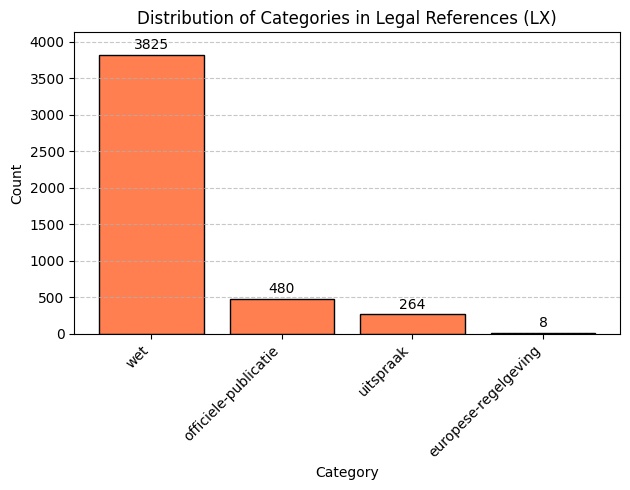

In [6]:
# Plot 2: Bar chart for the different categories
plt.figure(figsize=(6.4, 5))
bars = plt.bar(category_counts_lx.keys(), category_counts_lx.values(), color='coral', edgecolor='black')

# Add titles and labels
plt.title('Distribution of Categories in Legal References (LX)', fontsize=12)
plt.xlabel('Category', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(range(len(category_counts_lx)), category_counts_lx.keys(), rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust Y-axis limit dynamically
max_height = max(category_counts_lx.values())
plt.ylim(0, max_height * 1.08)  # Add 8% extra space above the highest bar

# Add numbers on top of bars
for bar in bars:
    yval = bar.get_height()  # Get the height of each bar
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate (center of the bar)
        yval + (max_height * 0.01),  # Y-coordinate (1% above the bar height)
        f'{int(yval)}',  # Display the count as an integer
        ha='center',  # Center-align the text
        va='bottom',  # Place the text above the bar
        fontsize=10
    )

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig('/Users/giacomograzia/Downloads/legal_references_categories_lx.png', dpi=300)
plt.show()


In [7]:
# Calculate the total number of legal references
total_references = df_lf['legal_references_lx'].apply(len).sum()

# Calculate the median, mean, and standard deviation
median_references = df_lf['legal_references_lx'].apply(len).median()
mean_references = df_lf['legal_references_lx'].apply(len).mean()
std_references = df_lf['legal_references_lx'].apply(len).std()

# Print the results
print(f"Total number of legal references: {total_references}")
print(f"Median number of legal references per document: {median_references}")
print(f"Mean number of legal references per document: {mean_references:.2f}")
print(f"Standard deviation of legal references per document: {std_references:.2f}")

Total number of legal references: 4577
Median number of legal references per document: 12.0
Mean number of legal references per document: 12.75
Standard deviation of legal references per document: 7.31


In [8]:
def is_empty_dict(dict_):
    if len(dict_) == 0:
        return 1
    else:
        return 0
df_lf['zero_legal_references'] = df_lf['legal_references_lx'].apply(is_empty_dict)

proportion_no_references = sum(df_lf['zero_legal_references']) / len(df_lf['zero_legal_references'])

print(f'According to the LX {proportion_no_references*100:.2f}% of the articles do not contain legal '
      f'references ({sum(df_lf["zero_legal_references"])} out of {len(df_lf["zero_legal_references"])}).')

According to the LX 1.11% of the articles do not contain legal references (4 out of 359).


### 2. LLM-based Legal Reference Extraction

#### 2.1 Prompt and API calls

In [ ]:
# Function to preprocess each row and call the OpenAI API for categorization
def extract_links_openai(row):
    """
    Processes a row to extract all the legal references, prepares a categorization prompt,
    and calls the OpenAI API to process the text and extract the legal references.

    :param row: a row from the DataFrame containing the text_pydf2 column (body of a decision).
    :return: dictionary containing the extracted legal references, their contexts, and the categories.
    """
    # Extract the text from the row
    decision_text = row.get("text_pypdf2", "")

    prompt = f"""
    Your task is to extract legal references and organize them in a Python dictionary. The dictionary structure should adhere to the following format:

    - Keys: Represent the specific names or identifiers of the legal articles (e.g., "Wet dieren", "Artikel 6:162 BW"), as written in the text.
    - Values: Contain a dictionary with two keys:
                - "context": the exact text strings from the decision body where the legal article or reference is mentioned.
                - "category": the category of the legal article or reference out of this list: 
                            "wet", "officiele-publicatie", "uitspraak", "europese-regelgeving".

    If no legal references (of any of the four given categories) are found in the text, return an empty dictionary ({{}}).

    Example Output (only the dictionary!):
    {{
        "Wet dieren": {{
            "context": "Op grond van de Wet dieren is het verboden om dieren te houden op een wijze die schade toebrengt aan hun welzijn of gezondheid.",
            "category": "wet"
        }},
        "Burgerlijk Wetboek Artikel 6:162": {{
            "context": "Volgens Artikel 6:162 van het Burgerlijk Wetboek is er sprake van een onrechtmatige daad wanneer iemand schade veroorzaakt door een handeling die in strijd is met het recht.",
            "category": "wet"
        }}
    }}

    Input (body of the decision): 
    {decision_text}
    """
    # Call the OpenAI API
    try:
        response = OpenAI().chat.completions.create(
            model="gpt-4o-mini",
            messages=[
                {"role": "system", "content": "You are tasked with analyzing the following body of an administrative decision \
                                                and identifying all legal articles and references mentioned within the text."},
                {"role": "user", "content": prompt},
            ],
            temperature=0,
            top_p=1,
            frequency_penalty=0,
            presence_penalty=0,
        )
        
        # Extract the assistant's response
        assistant_output = response.choices[0].message.content.strip()
        # Remove code block delimiters if present
        if assistant_output.startswith("```"):
            assistant_output = assistant_output.strip('```python').strip('```')
        
        # Convert the cleaned output into a dictionary
        return json.loads(assistant_output)  # Parse JSON response from API

    except json.JSONDecodeError as json_error:
        print(f"JSONDecodeError: {json_error}")
        print(f"Assistant Output:\n{assistant_output}")
        return {"error": "Invalid JSON format"}
    except Exception as e:
        return {"error": str(e)}  # Return error message in a dictionary format

# df_lf.to_csv("df_with_legal_references_openai.csv", index=False)

In [ ]:
df_lf["legal_references_openai_4omini"] = df_lf.progress_apply(extract_links_openai, axis=1)

In [ ]:
# Set display options
pd.options.display.max_colwidth = None  # Ensures columns show full content
pd.options.display.max_rows = None     # Ensures all rows are displayed
pd.options.display.max_columns = None  # Ensures all columns are displayed

df_lf[['text_pypdf2', 
       'legal_references_lx', 
       'legal_references_openai_4omini', 
       'proportion_in_context', 
       'proportion_in_text',
       'reference_count_lx',
       'reference_count_openai']].sample(5)

In [ ]:
pd.reset_option("all")  # Resets all Pandas display options to their default values

#### 2.2 Refererences reverse lookups

In [9]:
from rapidfuzz import fuzz  # Use rapidfuzz for efficient fuzzy matching

def reverse_lookup_with_fuzzy(row, threshold=80):
    """
    Calculates the proportion of OpenAI legal references found in the 'text_pypdf2'
    (original document) using reverse lookup and fuzzy matching.

    :param row: A row from the DataFrame.
    :param threshold: Similarity score threshold for fuzzy matching (default: 80).
    :return: A dictionary with the proportion of references found in the original text.
    """
    openai_references = row['legal_references_openai_4omini']  # OpenAI extracted references
    full_text = row['text_pypdf2']  # Original document text

    if not openai_references:  # Handle rows with no extracted references
        return {'proportion_in_text': None}

    total_refs = len(openai_references)
    count_in_text = 0

    for ref in openai_references.keys():
        # Check for exact or fuzzy match in the full text
        if ref in full_text or fuzz.partial_ratio(ref, full_text) >= threshold:
            count_in_text += 1

    # Calculate proportion
    proportion_in_text = count_in_text / total_refs if total_refs > 0 else 0

    return {
        'proportion_in_text': proportion_in_text
    }

# Apply the function to the DataFrame
df_lf['reverse_lookup_results'] = df_lf.apply(reverse_lookup_with_fuzzy, axis=1)

# Extract the proportion into a separate column
df_lf['proportion_in_text'] = df_lf['reverse_lookup_results'].apply(lambda x: x['proportion_in_text'])

# Drop the temporary column as no longer needed
df_lf.drop(columns=['reverse_lookup_results'], inplace=True)

# Summary of results
print("\nProportion of OpenAI References Found in Original Text (text_pypdf2):")
print(df_lf['proportion_in_text'].describe())


Proportion of OpenAI References Found in Original Text (text_pypdf2):
count    356.000000
mean       0.975283
std        0.101587
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: proportion_in_text, dtype: float64


In [10]:
# extracted ref (key) against text string (in decision)

print(f'{fuzz.partial_ratio('artikel 3:40 en 3:41 van de algemene wet bestuursrecht', 'artikel en 3:40 en 3:41 van de algemene wet bestuursrecht'):.2f}')

print(f'{fuzz.partial_ratio('artikel 7:1a, eerste lid, algemene wet bestuursrecht ', 'artikel 7:1a, eerste lid, van de algemene wet bestuursrecht'):.2f}')

94.44
86.79


In [11]:
percentile_4 = df_lf['proportion_in_text'].quantile(0.04) # around 14 docs
print(f"4th Percentile of Proportion in Text: {percentile_4}")

4th Percentile of Proportion in Text: 0.875


The 4th percentile indicates the value below which 4% of the data lies. In this case, the 4th percentile for the `proportion_in_text` column is `0.875`, meaning:

- **4% of rows** in the dataset have a `proportion_in_text` value of **0.875 or lower**.
- **96% of rows** have a `proportion_in_text` value greater than **0.875**.

This suggests that the distribution of `proportion_in_text` is **right-skewed**, with most values being relatively high (close to 1). Such a skewed distribution could occur if the majority of OpenAI-extracted legal references are successfully found in the original text, leaving only a small percentage with lower proportions.


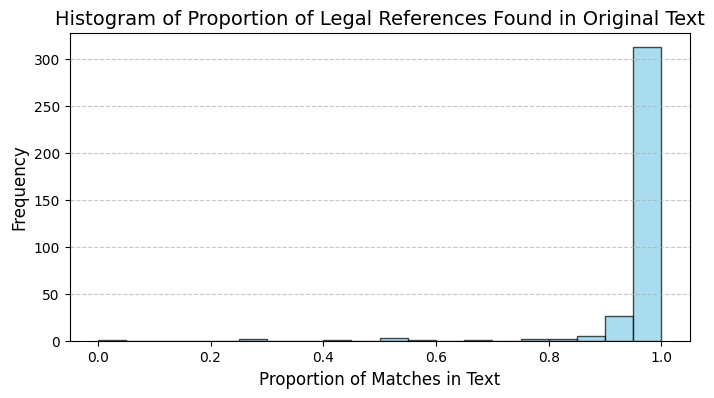

In [12]:
import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(8, 4))
plt.hist(df_lf['proportion_in_text'].dropna(), bins=20, edgecolor='black', color='skyblue', alpha=0.7)

# Add titles and labels
plt.title('Histogram of Proportion of Legal References Found in Original Text', fontsize=14)
plt.xlabel('Proportion of Matches in Text', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
#plt.tight_layout(pad=10)

# plt.savefig('/Users/giacomograzia/Downloads/proportion_legal_references_text.png', dpi=300)
plt.show()


#### 2.3 References distribution and statistics

In [13]:
# Calculate the total number of legal references
total_references = df_lf['legal_references_openai_4omini'].apply(len).sum()

# Calculate the median, mean, and standard deviation
median_references = df_lf['legal_references_openai_4omini'].apply(len).median()
mean_references = df_lf['legal_references_openai_4omini'].apply(len).mean()
std_references = df_lf['legal_references_openai_4omini'].apply(len).std()

# Print the results
print(f"Total number of legal references: {total_references}")
print(f"Median number of legal references per document: {median_references}")
print(f"Mean number of legal references per document: {mean_references:.2f}")
print(f"Standard deviation of legal references per document: {std_references:.2f}")

Total number of legal references: 3637
Median number of legal references per document: 10.0
Mean number of legal references per document: 10.13
Standard deviation of legal references per document: 4.55


In [14]:
# Ensure the legal_references_openai_4omini column contains valid dictionaries
# Some rows may contain errors or invalid outputs, so we'll filter those out.
def parse_openai_output(row):
    try:
        # Ensure each entry is a valid dictionary
        return ast.literal_eval(row) if isinstance(row, str) else row
    except Exception:
        return {}

# Parse the 'legal_references_openai_4omini' column
df_lf['legal_references_openai_4omini'] = df_lf['legal_references_openai_4omini'].apply(parse_openai_output)

# Calculate the count of references for each row
df_lf['reference_count_openai'] = df_lf['legal_references_openai_4omini'].apply(len)

# Extract all categories from the dictionaries
categories_openai = []
for legal_refs in df_lf['legal_references_openai_4omini']:
    categories_openai.extend([ref_data['category'] for ref_data in legal_refs.values()])

# Count the occurrences of each category
category_counts_openai = Counter(categories_openai)

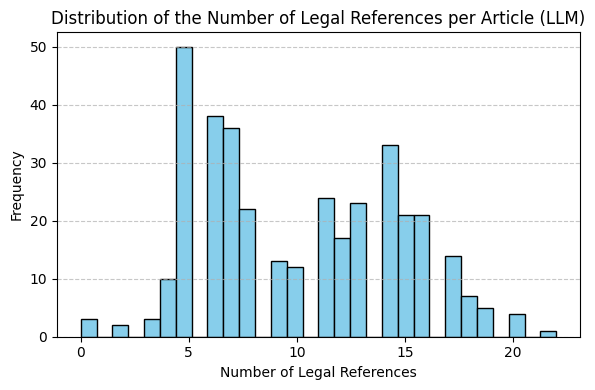

In [15]:
import matplotlib.pyplot as plt
from textwrap import wrap

# Plot 1: Distribution of counts of references
plt.figure(figsize=(6, 4))

# Histogram Plot
plt.hist(df_lf['reference_count_openai'], bins=30, edgecolor='black', color='skyblue')

# Long Title with Wrapping
myTitle = "Distribution of the Number of Legal References per Article (LLM)"
wrapped_title = "\n".join(wrap(myTitle, width=70))  # Adjust width for wrapping

# Titles and Labels
plt.title(wrapped_title, fontsize=12)
plt.xlabel('Number of Legal References', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save and Show the Plot
plt.tight_layout()
# plt.savefig('/Users/giacomograzia/Downloads/legal_references_distribution_openai.png', dpi=300)
plt.show()


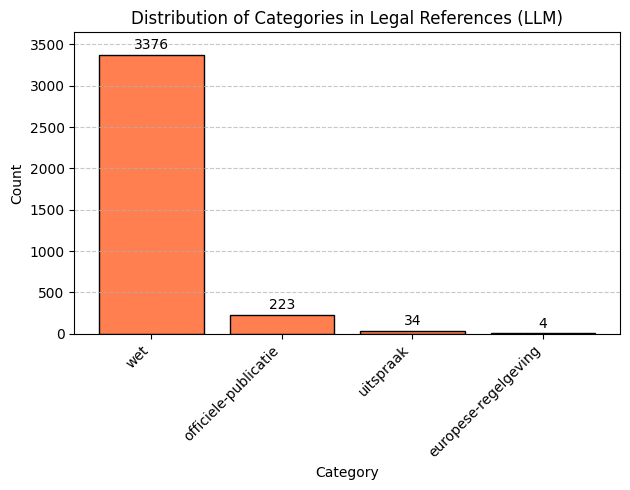

In [16]:
# Plot 2: Bar chart for the different categories
plt.figure(figsize=(6.4, 5))
bars = plt.bar(category_counts_openai.keys(), category_counts_openai.values(), color='coral', edgecolor='black')

# Add titles and labels
plt.title('Distribution of Categories in Legal References (LLM)', fontsize=12)
plt.xlabel('Category', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(range(len(category_counts_openai)), category_counts_openai.keys(), rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust Y-axis limit dynamically
max_height = max(category_counts_openai.values())
plt.ylim(0, max_height * 1.08)  # Add 8% extra space above the highest bar

# Add numbers on top of bars
for bar in bars:
    yval = bar.get_height()  # Get the height of each bar
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate (center of the bar)
        yval + (max_height * 0.01),  # Y-coordinate (1% above the bar height)
        f'{int(yval)}',  # Display the count as an integer
        ha='center',  # Center-align the text
        va='bottom',  # Place the text above the bar
        fontsize=10
    )

# Adjust layout and save the plot
plt.tight_layout()
# plt.savefig('/Users/giacomograzia/Downloads/legal_references_categories_openai.png', dpi=300)
plt.show()


### 3. Comparison of approaches

In [17]:
# Data for the dataframe
data = {
    "category": ["wet", "officiële publicatie", "uitspraak", "europese-regelgeving"],
    "LX count": [3825, 480, 264, 8],
    "OpenAI count": [3376, 223, 34, 4]
}

# Create the initial dataframe
df = pd.DataFrame(data)

# Calculate proportions
df["LX proportion"] = df["LX count"] / df["LX count"].sum()
df["OpenAI proportion"] = df["OpenAI count"] / df["OpenAI count"].sum()

# Display the dataframe
df.round(3)#.to_latex(float_format="%.3f", index=False)

,category,LX count,OpenAI count,LX proportion,OpenAI proportion
0,wet,3825,3376,0.836,0.928
1,officiële publicatie,480,223,0.105,0.061
2,uitspraak,264,34,0.058,0.009
3,europese-regelgeving,8,4,0.002,0.001


In [18]:
from ipywidgets import interact, IntSlider
import numpy as np

# Ensure consistent indexing
df_lf = df_lf.reset_index(drop=True)

# Calculate text length based on white space split
df_lf['text_length_'] = df_lf['text_pypdf2'].apply(lambda text: len(str(text).split()) if pd.notnull(text) else 0)

# Custom Min-Max Scaling Function to [0, 25]
def scale_to_range(series, target_min=0, target_max=25):
    min_val = series.min()
    max_val = series.max()
    if min_val == max_val:
        return pd.Series([target_min] * len(series))  # Handle constant series
    return target_min + (series - min_val) * (target_max - target_min) / (max_val - min_val)

# Function to plot with adjustable binning
def plot_interactive(bin_size):
    plt.close('all')
    
    # Aggregate data by bin size
    binned_x = np.arange(0, len(df_lf), bin_size)
    binned_y1 = [df_lf['reference_count_lx'].iloc[i:i+bin_size].mean() for i in binned_x]
    binned_y2 = [df_lf['reference_count_openai'].iloc[i:i+bin_size].mean() for i in binned_x]
    binned_y3 = [df_lf['text_length_'].iloc[i:i+bin_size].mean() for i in binned_x]
    
    # Scale text length to match the range [0, 25]
    binned_y3_scaled = scale_to_range(pd.Series(binned_y3), 0, 25)
    
    # Plot
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(binned_x, binned_y1, label='LX Legal References', color='#027bc7', marker='o')
    ax.plot(binned_x, binned_y2, label='OpenAI Legal References', color='#74AA9C', marker='o')
    ax.plot(binned_x, binned_y3_scaled, label='Text Length (Scaled to 0-25)', color='#FFD166', marker='o', linestyle='--')
    
    # Titles and Labels
    myTitle = f"Legal References Count and Scaled Text Length per Document (Binned by {bin_size})"
    wrapped_title = "\n".join(wrap(myTitle, width=40)) 
    ax.set_title(f'{wrapped_title}', fontsize=12)
    ax.set_xlabel('Document Index (Binned)', fontsize=10)
    ax.set_ylabel('Average Number of Legal References', fontsize=10)
    ax.legend(fontsize=10)
    ax.grid(alpha=0.5)
    
    plt.tight_layout()
    # plt.savefig('/Users/giacomograzia/Downloads/legal_references_lines_with_text_length.png', dpi=300)
    plt.show()

# Interactive widget
interact(plot_interactive, bin_size=IntSlider(min=1, max=50, step=1, value=10));


interactive(children=(IntSlider(value=10, description='bin_size', max=50, min=1), Output()), _dom_classes=('wi…

In [19]:
from ipywidgets import interact, IntSlider
import numpy as np

# Ensure consistent indexing
df_lf = df_lf.reset_index(drop=True)

# Calculate text length based on white space split
df_lf['text_length_'] = df_lf['text_pypdf2'].apply(lambda text: len(str(text).split()) if pd.notnull(text) else 0)

# Custom Min-Max Scaling Function to [0, 25]
def scale_to_range(series, target_min=0, target_max=25):
    min_val = series.min()
    max_val = series.max()
    if min_val == max_val:
        return pd.Series([target_min] * len(series))  # Handle constant series
    return target_min + (series - min_val) * (target_max - target_min) / (max_val - min_val)

# Function to plot with adjustable binning
def plot_interactive(bin_size):
    plt.close('all')
    
    # Sort DataFrame by text length
    df_sorted = df_lf.sort_values(by='text_length_').reset_index(drop=True)
    
    # Aggregate data by bin size
    binned_x = []
    binned_y1 = []
    binned_y2 = []
    binned_y3 = []
    
    for i in range(0, len(df_sorted), bin_size):
        bin_slice = df_sorted.iloc[i:i+bin_size]
        binned_x.append(bin_slice['text_length_'].mean())
        binned_y1.append(bin_slice['reference_count_lx'].mean())
        binned_y2.append(bin_slice['reference_count_openai'].mean())
        binned_y3.append(bin_slice['text_length_'].mean())
    
    # Scale text length to match the range [0, 25]
    binned_y3_scaled = scale_to_range(pd.Series(binned_y3), 0, 25)
    
    # Plot
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(binned_x, binned_y1, label='LX Legal References', color='#027bc7', marker='o', alpha=0.9)
    ax.plot(binned_x, binned_y2, label='OpenAI Legal References', color='#74AA9C', marker='o', alpha=0.9)
    ax.plot(binned_x, binned_y3_scaled, label='Text Length (Scaled to 0-25)', color='#FFD166', marker='o', linestyle='--')
    
    # Titles and Labels
    myTitle = f"Legal References Count and Scaled Text Length per Document (Binned by {bin_size})"
    wrapped_title = "\n".join(wrap(myTitle, width=40)) 
    ax.set_title(f'{wrapped_title}', fontsize=12)
    ax.set_xlabel('Average Document Length in Bin', fontsize=10)
    ax.set_ylabel('Average Number of Legal References', fontsize=10)
    ax.legend(fontsize=10)
    ax.grid(alpha=0.5)
    
    plt.tight_layout()
    # plt.savefig('/Users/giacomograzia/Downloads/legal_references_lines_binned_by_text_length.png', dpi=300)
    plt.show()

# Interactive widget
interact(plot_interactive, bin_size=IntSlider(min=1, max=50, step=1, value=20));

interactive(children=(IntSlider(value=20, description='bin_size', max=50, min=1), Output()), _dom_classes=('wi…

In [21]:
# Calculate and print the correlation between 'reference_count_lx' and 'reference_count_openai'
correlation_lx_openai = df_lf['reference_count_lx'].corr(df_lf['reference_count_openai'])
print(f"Correlation between reference_count_lx and reference_count_openai: {correlation_lx_openai:.2f}")

# Calculate and print the correlation between 'reference_count_lx' and 'text_length_'
correlation_lx_text_length = df_lf['reference_count_lx'].corr(df_lf['text_length_'])
print(f"Correlation between reference_count_lx and text_length_: {correlation_lx_text_length:.2f}")

# Calculate and print the correlation between 'reference_count_openai' and 'text_length_'
correlation_openai_text_length = df_lf['reference_count_openai'].corr(df_lf['text_length_'])
print(f"Correlation between reference_count_openai and text_length_: {correlation_openai_text_length:.2f}")

Correlation between reference_count_lx and reference_count_openai: 0.62
Correlation between reference_count_lx and text_length_: 0.55
Correlation between reference_count_openai and text_length_: 0.29


In [22]:
# Set display options
pd.options.display.max_colwidth = None  # Ensures columns show full content
pd.options.display.max_rows = None     # Ensures all rows are displayed
pd.options.display.max_columns = None  # Ensures all columns are displayed

df_lf[['id','file_number', 'legal_references_lx', 'reference_count_lx', 'legal_references_openai_4omini', 'reference_count_openai']].sample(2)

,id,file_number,legal_references_lx,reference_count_lx,legal_references_openai_4omini,reference_count_openai
53,id_acm_energy_permit_14,1,"{'ervan': {'category': 'uitspraak', 'attributes': {}}, 'stcrt. 2022, 26419': {'category': 'officiele-publicatie', 'attributes': {}}, 'stct. 2022, 26419': {'category': 'officiele-publicatie', 'attributes': {}}, 'stct. 2022, 26273': {'category': 'officiele-publicatie', 'attributes': {}}, 'artikel 95b, eerste lid, elektriciteitswet 1998': {'category': 'wet', 'attributes': {}}, 'artikel 95a elektriciteitswet 1998': {'category': 'wet', 'attributes': {}}, 'artikel 95e, eerste en tweede lid, elektriciteitswet 1998': {'category': 'wet', 'attributes': {}}, 'ecli:nl:cbb:2023:745': {'category': 'uitspraak', 'attributes': {}}, 'artikel 95f elektriciteitswet 1998': {'category': 'wet', 'attributes': {}}, 'artikel 5, tweede en derde lid, van de beleidsregel betrouwbare levering van elektriciteit of gas en continuïteit van energieleveranciers': {'category': 'wet', 'attributes': {}}, 'bez': {'category': 'uitspraak', 'attributes': {}}, 'ecli:nl:rbrot:2018:5321': {'category': 'uitspraak', 'attributes': {}}, 'ecli:nl:rbrot:2020:2405': {'category': 'uitspraak', 'attributes': {}}, 'beleidsregel betrouwbare levering van elektriciteit of gas en continuïteit van energieleveranciers': {'category': 'wet', 'attributes': {}}, 'artikel 8, derde lid, van de beleidsregel betrouwbare levering van elektriciteit of gas en continuïteit van energieleveranciers': {'category': 'wet', 'attributes': {}}, 'elektriciteitswet 1998 artikel 95a': {'category': 'wet', 'attributes': {}}, 'artikel 24a van boek 2 van het burgerlijk wetboek': {'category': 'wet', 'attributes': {}}, 'artikelen 236 en 237 van boek 6 van het burgerlijk wetboek': {'category': 'wet', 'attributes': {}}, 'instellingswet autoriteit consument en markt artikel 12w': {'category': 'wet', 'attributes': {}}, 'artikel 5.1, eerste, tweede en vijfde lid, van de wet open overheid': {'category': 'wet', 'attributes': {}}}",20,"{'Artikel 12w, eerste lid, Instellingswet Autoriteit Consument en Markt': {'context': 'de acm heeft toegelicht dat zij op grond van artikel 12w, eerste lid, iw bevoegd is om het voorschriftenbesluit openbaar te maken.', 'category': 'wet'}, 'Artikel 95a Elektriciteitswet 1998': {'context': 'zie artikelen 95a en 95b e-wet en artikelen 43 en 44 g-wet.', 'category': 'wet'}, 'Artikel 95b Elektriciteitswet 1998': {'context': 'zie artikelen 95a en 95b e-wet en artikelen 43 en 44 g-wet.', 'category': 'wet'}, 'Artikel 43 Gaswet': {'context': 'zie artikelen 95a en 95b e-wet en artikelen 43 en 44 g-wet.', 'category': 'wet'}, 'Artikel 44 Gaswet': {'context': 'zie artikelen 95a en 95b e-wet en artikelen 43 en 44 g-wet.', 'category': 'wet'}, 'Artikel 95f Elektriciteitswet 1998': {'context': 'artikel 95f elektriciteitswet 1998 en artikel 47 gaswet de vergunningen van hem op enig moment in te trekken.', 'category': 'wet'}, 'Artikel 5, tweede lid, Beleidsregel': {'context': 'de acm deelt dit standpunt van hem niet. allereerst heeft de acm al in het voorschriftenbesluit het volgende aangegeven: ook op basis van de liquiditeitsprognose in de aanvulling op het herstelplan dat hem op 26 juli 2023 heeft aangeleverd, kan de acm niet vaststellen dat hem beschikt over een positieve liquiditeitspositie in het stressscenario.', 'category': 'wet'}, 'ECLI:NL:CBB:2023:745': {'context': 'de voorzieningenrechter van het cbb heeft de acm gevolgd, zie ecli:nl:cbb:2023:745, college van beroep voor het bedrijfsleven, 23/1869 (rechtspraak.nl), r.o. 8.1.', 'category': 'uitspraak'}}",8
207,id_acm_energy_permit_264,1,"{'artikel 4:2, eerste lid, van de algemene wet bestuursrecht': {'category': 'wet', 'attributes': {}}, 'awb': {'category': 'wet', 'attributes': {}}, 'artikel 4:2, tweede lid, van de awb': {'category': 'wet', 'attributes': {}}, 'stcrt. 2013, nr. 9697': {'category': 'officiele-publicatie', 'attributes': {}}, 'artikel 2 van het besluit vergunning levering gas aan kleinverbruikers': {'c

In [23]:
pd.reset_option("all")  # Resets all Pandas display options to their default values

/var/folders/6r/fy40h3sj5sz87ctgpzyw1lgm0000gn/T/ipykernel_20303/1350613189.py:1: FutureWarning: data_manager option is deprecated and will be removed in a future version. Only the BlockManager will be available.
  pd.reset_option("all")  # Resets all Pandas display options to their default values
/var/folders/6r/fy40h3sj5sz87ctgpzyw1lgm0000gn/T/ipykernel_20303/1350613189.py:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option("all")  # Resets all Pandas display options to their default values


In [24]:
import re

def normalize_reference(ref):
    """
    Normalizes a legal reference by:
    - Converting to lowercase.
    - Removing punctuation and extra spaces.
    """
    ref = ref.lower()  # Convert to lowercase
    #ref = re.sub(r'[\s.,;:]', ' ', ref)  # Replace punctuation with a space
    ref = re.sub(r'\s+', ' ', ref).strip()  # Remove extra spaces
    return ref

def compare_references_within_document(row):
    """
    Compares legal references between LX and OpenAI within a single document.

    :param row: A row of the DataFrame containing 'legal_references_lx' and 'legal_references_openai_4omini'.
    :return: A dictionary with matched, unmatched LX, and unmatched OpenAI references.
    """
    lx_refs = row['legal_references_lx'].keys()  # LX references
    openai_refs = row['legal_references_openai_4omini'].keys()  # OpenAI references
    
    # Normalize the references
    lx_refs_normalized = {normalize_reference(ref) for ref in lx_refs}
    openai_refs_normalized = {normalize_reference(ref) for ref in openai_refs}

    # Find matches, unmatched LX, and unmatched OpenAI references
    matches = lx_refs_normalized & openai_refs_normalized  # Intersection of sets
    unmatched_lx = lx_refs_normalized - openai_refs_normalized
    unmatched_openai = openai_refs_normalized - lx_refs_normalized

    return {
        'matches': list(matches),
        'unmatched_lx': list(unmatched_lx),
        'unmatched_openai': list(unmatched_openai)
    }

# Apply the comparison function to each row in the DataFrame
df_lf['comparison_results'] = df_lf.apply(compare_references_within_document, axis=1)

# Extract results into separate columns
df_lf['num_matches'] = df_lf['comparison_results'].apply(lambda x: len(x['matches']))
df_lf['num_unmatched_lx'] = df_lf['comparison_results'].apply(lambda x: len(x['unmatched_lx']))
df_lf['num_unmatched_openai'] = df_lf['comparison_results'].apply(lambda x: len(x['unmatched_openai']))

# Display the summary
print("Summary of Matches and Unmatched References:")
print(df_lf[['num_matches', 'num_unmatched_lx', 'num_unmatched_openai']].describe())

# Optional: Inspect a specific row
row_idx = 0  # Change to any row index you want to inspect
print("\nMatches in Document:")
print(df_lf.loc[row_idx, 'comparison_results']['matches'])
print("\nUnmatched LX References:")
print(df_lf.loc[row_idx, 'comparison_results']['unmatched_lx'])
print("\nUnmatched OpenAI References:")
print(df_lf.loc[row_idx, 'comparison_results']['unmatched_openai'])


Summary of Matches and Unmatched References:
       num_matches  num_unmatched_lx  num_unmatched_openai
count   359.000000        359.000000            359.000000
mean      4.161560          8.587744              5.969359
std       3.298311          5.731172              3.991843
min       0.000000          0.000000              0.000000
25%       2.000000          4.000000              3.000000
50%       4.000000          8.000000              5.000000
75%       6.000000         11.000000              9.000000
max      14.000000         42.000000             18.000000

Matches in Document:
[]

Unmatched LX References:
['besluit organisatie, mandaat, volmacht en machtiging acm 2013', 'stcrt. 2013, nr. 9333', 'algemene wet bestuursrecht']

Unmatched OpenAI References:
['artikel 47, eerste lid, onderdeel a, van de gaswet', 'artikel 43, eerste lid, van de gaswet', 'artikel 44 van de gaswet', 'artikel 45 van de gaswet', 'artikel 47, eerste lid, van de gaswet', 'artikel 52b van de gaswet', 

Creating lists with matches from each approach

In [25]:
# Initialize empty LISTS for OpenAI matches and LX matches
openai_ref_set = set()
lx_ref_set = set()

# Iterate through all rows in the DataFrame and extract the relevant values
for _, row in df_lf.iterrows():
    comparison = row['comparison_results']  # Extract the comparison_results dictionary
    
    # Add matches to the respective lists
    lx_ref_set.update(comparison.get('matches', []))  # Matches found by LX
    lx_ref_set.update(comparison.get('unmatched_lx', []))  # Matches found by LX
    
    openai_ref_set.update(comparison.get('matches', []))  # Matches found by LX
    openai_ref_set.update(comparison.get('unmatched_openai', []))  # Matches found by OpenAI

# Output the sizes of the lists for verification
print(f"Total Matches by LX: {len(lx_ref_set)}")
print(f"Total Matches by OpenAI: {len(openai_ref_set)}")

intersection = lx_ref_set & openai_ref_set  # Intersection of both sets
print(f"Total Matches in Common (intesrection): {len(intersection)}")

Total Matches by LX: 587
Total Matches by OpenAI: 609
Total Matches in Common (intesrection): 232


Computing set differences

In [26]:
# Compute the set differences
lx_only = lx_ref_set - openai_ref_set  # LX Only: Found by LX, not OpenAI
openai_only = openai_ref_set - lx_ref_set  # OpenAI Only: Found by OpenAI, not LX

# Output results
print(f"Total References by LX Only: {len(lx_only)}")
print(f"Total References by OpenAI Only: {len(openai_only)}")

Total References by LX Only: 355
Total References by OpenAI Only: 377


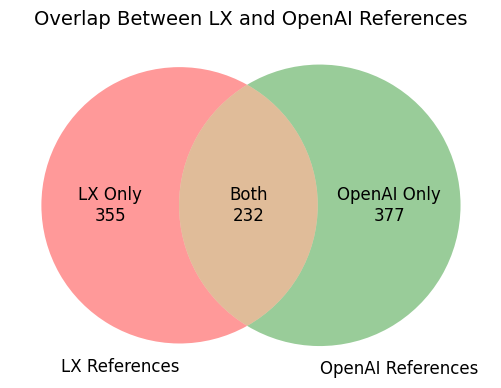

In [27]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Compute set differences
lx_only = lx_ref_set - openai_ref_set  # LX Only
openai_only = openai_ref_set - lx_ref_set  # OpenAI Only
intersection = lx_ref_set & openai_ref_set  # Both LX and OpenAI

# Plot the Venn Diagram
plt.figure(figsize=(6, 4))
venn = venn2([lx_ref_set, openai_ref_set], set_labels=('LX References', 'OpenAI References'))

# Update the counts dynamically with larger font size
venn.get_label_by_id('10').set_text(f"LX Only\n{len(lx_only)}")
venn.get_label_by_id('01').set_text(f"OpenAI Only\n{len(openai_only)}")
venn.get_label_by_id('11').set_text(f"Both\n{len(intersection)}")

# Adjust font size for subset labels (numbers inside the Venn diagram)
for subset_label in ['10', '01', '11']:
    label = venn.get_label_by_id(subset_label)
    if label:  # Check if label exists
        label.set_fontsize(12)  # Adjust subset count font size

# Adjust font size for set labels (LX References, OpenAI References)
for label in venn.set_labels:
    if label:  # Check if label exists
        label.set_fontsize(12)  # Adjust set label font size

# Add a title with adjusted font size
plt.title("Overlap Between LX and OpenAI References", fontsize=14)

# Show the plot
plt.tight_layout()
# plt.savefig('/Users/giacomograzia/Downloads/venn_diagram_references.png', dpi=300)
plt.show()

In [28]:
from rapidfuzz import fuzz

# Create a list for storing the similarity results
similarity_results = []

# Iterate through the Cartesian product of the two sets
for lx_ref in lx_only:
    for openai_ref in openai_only:
        # Compute similarity using RapidFuzz
        similarity_score = fuzz.token_sort_ratio(lx_ref, openai_ref)
        
        # Append the results
        similarity_results.append({
            'LX Reference': lx_ref,
            'OpenAI Reference': openai_ref,
            'Similarity Score': similarity_score
        })

# Convert results to a DataFrame
similarity_df = pd.DataFrame(similarity_results)

# Sort the DataFrame by similarity score in descending order
similarity_df = similarity_df.sort_values(by='Similarity Score', ascending=False).reset_index(drop=True)

similarity_df.head(8)
# Save to a CSV file (optional)
# similarity_df.to_csv('similarity_comparison.csv', index=False)


,LX Reference,OpenAI Reference,Similarity Score
0,"artikel 95b, eerste lid, van de elektriciteits...","artikel 95, eerste lid, van de elektriciteitsw...",99.065421
1,"artikel 5, eerste lid, elektriciteitswet 1998","artikel 45, eerste lid, elektriciteitswet 1998",98.901099
2,"artikel 2, lid 2 sub g van het besluit","artikel 2, lid 2, sub g van het besluit",98.701299
3,artikel 3 van de elektriciteitswet,artikel 43 van de elektriciteitswet,98.550725
4,"artikel 12r, eerste lid, instellingswet autori...","artikel 12w, eerste lid, instellingswet autori...",98.550725
5,"artikel 95d, eerste lid van de elektriciteitsw...","artikel 95, eerste lid, van de elektriciteitsw...",98.113208
6,"artikel 95a, eerste lid van de elektriciteitsw...","artikel 95, eerste lid, van de elektriciteitsw...",98.113208
7,"artikel 45, eerste lid, van de elektriciteitsw...","artikel 95, eerste lid, van de elektriciteitsw...",98.113208


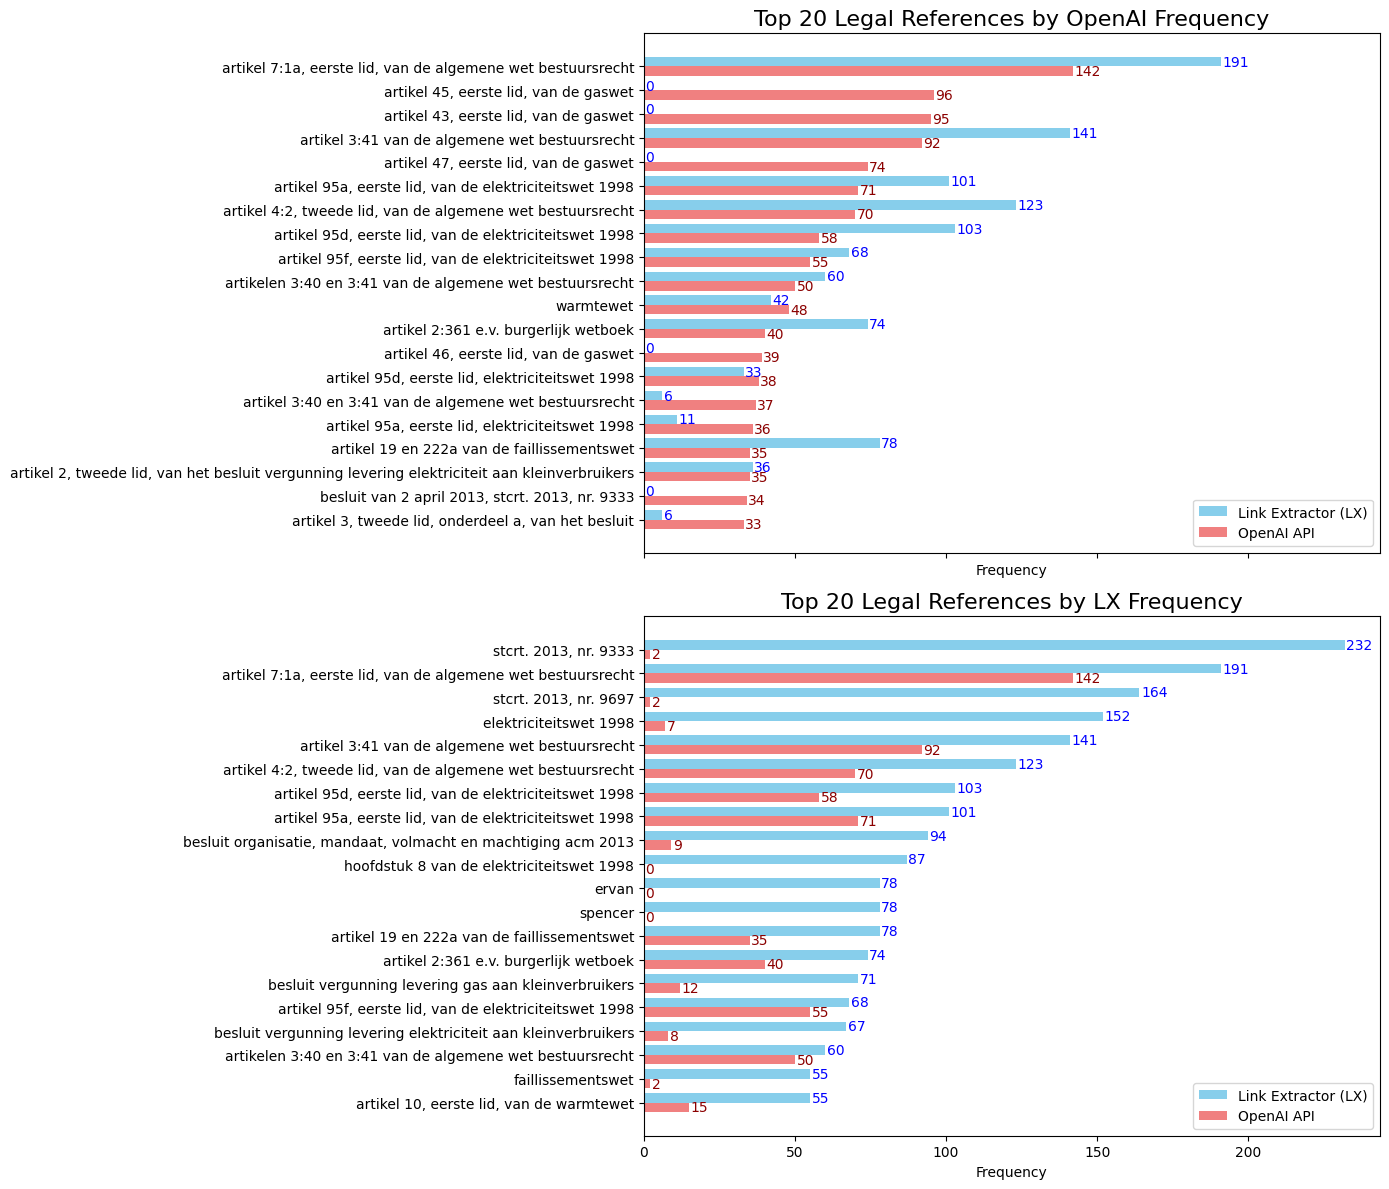

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Function to extract references for LX and OpenAI separately
def extract_references(row):
    lx_refs = list(row['legal_references_lx'].keys())
    openai_refs = list(row['legal_references_openai_4omini'].keys())
    return lx_refs, openai_refs

# Apply function to extract references into two separate columns
df_lf['lx_references'] = df_lf.apply(lambda row: list(row['legal_references_lx'].keys()), axis=1)
df_lf['openai_references'] = df_lf.apply(lambda row: list(row['legal_references_openai_4omini'].keys()), axis=1)

# Flatten the lists of references for each system
lx_references_flat = [ref for refs in df_lf['lx_references'] for ref in refs]
openai_references_flat = [ref for refs in df_lf['openai_references'] for ref in refs]

# Count the frequency of each reference
lx_reference_counts = Counter(lx_references_flat)
openai_reference_counts = Counter(openai_references_flat)

# Merge the frequencies into a single DataFrame
all_references = set(lx_reference_counts.keys()).union(set(openai_reference_counts.keys()))
combined_df = pd.DataFrame({
    'Legal Reference': list(all_references),
    'LX Frequency': [lx_reference_counts.get(ref, 0) for ref in all_references],
    'OpenAI Frequency': [openai_reference_counts.get(ref, 0) for ref in all_references]
})

# Create two sorted DataFrames
combined_df_openai_sorted = combined_df.sort_values(by='OpenAI Frequency', ascending=False).reset_index(drop=True)
combined_df_lx_sorted = combined_df.sort_values(by='LX Frequency', ascending=False).reset_index(drop=True)

# Plot stacked plots
top_n = 20  # Number of top references to display
fig, axes = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

# Plot sorted by OpenAI Frequency
x_openai = combined_df_openai_sorted['Legal Reference'][:top_n]
lx_freq_openai = combined_df_openai_sorted['LX Frequency'][:top_n]
openai_freq_openai = combined_df_openai_sorted['OpenAI Frequency'][:top_n]
bar_width = 0.4
x_indices_openai = range(len(x_openai))

bars_lx_openai = axes[0].barh(
    [index - bar_width/2 for index in x_indices_openai],
    lx_freq_openai,
    height=bar_width,
    color='skyblue',
    label='Link Extractor (LX)'
)
bars_openai_openai = axes[0].barh(
    [index + bar_width/2 for index in x_indices_openai],
    openai_freq_openai,
    height=bar_width,
    color='lightcoral',
    label='OpenAI API'
)
axes[0].set_yticks(x_indices_openai)
axes[0].set_yticklabels(x_openai)
axes[0].invert_yaxis()
axes[0].set_title('Top 20 Legal References by OpenAI Frequency', fontsize=16)
axes[0].set_xlabel('Frequency')
axes[0].legend()

# Add numbers on top of bars for OpenAI Frequency plot
for bar in bars_lx_openai:
    axes[0].text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', va='center', fontsize=10, color='blue')
for bar in bars_openai_openai:
    axes[0].text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', va='center', fontsize=10, color='darkred')

# Plot sorted by LX Frequency
x_lx = combined_df_lx_sorted['Legal Reference'][:top_n]
lx_freq_lx = combined_df_lx_sorted['LX Frequency'][:top_n]
openai_freq_lx = combined_df_lx_sorted['OpenAI Frequency'][:top_n]
x_indices_lx = range(len(x_lx))

bars_lx_lx = axes[1].barh(
    [index - bar_width/2 for index in x_indices_lx],
    lx_freq_lx,
    height=bar_width,
    color='skyblue',
    label='Link Extractor (LX)'
)
bars_openai_lx = axes[1].barh(
    [index + bar_width/2 for index in x_indices_lx],
    openai_freq_lx,
    height=bar_width,
    color='lightcoral',
    label='OpenAI API'
)
axes[1].set_yticks(x_indices_lx)
axes[1].set_yticklabels(x_lx)
axes[1].invert_yaxis()
axes[1].set_title('Top 20 Legal References by LX Frequency', fontsize=16)
axes[1].set_xlabel('Frequency')
axes[1].legend()

# Add numbers on top of bars for LX Frequency plot
for bar in bars_lx_lx:
    axes[1].text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', va='center', fontsize=10, color='blue')
for bar in bars_openai_lx:
    axes[1].text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', va='center', fontsize=10, color='darkred')

# Adjust layout and show plot
plt.tight_layout()
# plt.savefig('/Users/giacomograzia/Downloads/legal_references_stacked_bar.png', dpi=300)
plt.show()
